<a href="https://colab.research.google.com/github/MohsenJadidi/ISLR/blob/master/Simple_example_using_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Define Model

In [8]:
import tensorflow as tf   
import numpy as np

class MyModel(tf.keras.Model):
    def __init__(self):
        super(MyModel, self).__init__()
        self.w = tf.Variable(0.5,trainable=True,dtype=np.float64,name='w')
        self.b = tf.Variable(0.5,trainable=True,dtype=np.float64,name='bias')  

    def __call__(self, x):
        y = self.w*x+self.b
        return y 

optimizer = tf.keras.optimizers.Adam(learning_rate=.1)

def train_step(X, Y):
    with tf.GradientTape() as tape:
        Y_predicted = model(X)
        # loss = (tf.square (Y - Y_predicted))
        # print("loss is"+str(loss))
        loss = tf.math.reduce_mean(tf.square (Y - Y_predicted))
        print(model.trainable_variables)
    
    trainable_vars = model.trainable_variables
    gradients = tape.gradient(loss, trainable_vars)
    #print(gradients)
    optimizer.apply_gradients(zip(gradients, model.trainable_variables))

model = MyModel()
model([1])

<tf.Tensor: shape=(1,), dtype=float64, numpy=array([1.])>

## Train Model

[<tf.Variable 'w:0' shape=() dtype=float64, numpy=0.5>, <tf.Variable 'bias:0' shape=() dtype=float64, numpy=0.5>]
[<tf.Variable 'w:0' shape=() dtype=float64, numpy=0.6000000010463626>, <tf.Variable 'bias:0' shape=() dtype=float64, numpy=0.5999999969563556>]
[<tf.Variable 'w:0' shape=() dtype=float64, numpy=0.697680343441817>, <tf.Variable 'bias:0' shape=() dtype=float64, numpy=0.6996597581939499>]
[<tf.Variable 'w:0' shape=() dtype=float64, numpy=0.7959859918390826>, <tf.Variable 'bias:0' shape=() dtype=float64, numpy=0.7994874028528347>]
[<tf.Variable 'w:0' shape=() dtype=float64, numpy=0.8946641352143727>, <tf.Variable 'bias:0' shape=() dtype=float64, numpy=0.8994593063013444>]
[<tf.Variable 'w:0' shape=() dtype=float64, numpy=0.993317518177016>, <tf.Variable 'bias:0' shape=() dtype=float64, numpy=0.9996032587441377>]
[<tf.Variable 'w:0' shape=() dtype=float64, numpy=1.0922989911227252>, <tf.Variable 'bias:0' shape=() dtype=float64, numpy=1.0994651784279927>]
[<tf.Variable 'w:0' shap

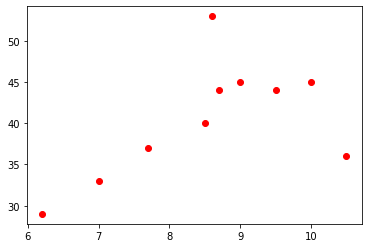

In [9]:
n_epochs = 200
w_list=[]
MSE_List=[]

Data = np.array([[ 6.2, 29. ],
       [ 9.5, 44. ],
       [10.5, 36. ],
       [ 7.7, 37. ],
       [ 7, 33. ],
       [ 9, 45. ],
       [ 8.5, 40. ],
       [ 8.7, 44. ],
       [ 10, 45. ],
       [ 8.6, 53. ]])

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(Data[:,0], Data[:,1], 'ro', label='Original data')

Data_len=Data.shape[0]
batch_size = 2

for epoch in range(n_epochs):
  np.random.shuffle(Data)
  for iter in range(int(Data_len/batch_size)):
    X_batch=[Data[iter*batch_size:(iter+1)*batch_size,0]]
    Y_batch=[Data[iter*batch_size:(iter+1)*batch_size,1]]
    train_step(X_batch, Y_batch)
    w_list.append(model.w.numpy())

    Y_hat=model([Data[:,0]])
    Train_MSE=np.mean((Data[:,1]-Y_hat)**2)
    # print(Train_MSE)
    MSE_List.append(Train_MSE)



## Plot

In [ ]:
import matplotlib.pyplot as plt 

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(w_list)

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(MSE_List)

plt.plot(Data[:,0], Data[:,1], 'ro', label='Original data')

predicted_y=np.zeros(0)
x_input=np.linspace(Data[:,0].min(),Data[:,0].max(),100)
for idx in range(x_input.shape[0]):
    predicted_val=model([x_input[idx]])
    predicted_y=np.append(predicted_y,predicted_val)
    
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(x_input,predicted_y, label='Fitted line')